In [1]:
# Importing related Python libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Importing SKLearn clssifiers and libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data_path = '/home/jovyan/work/preparation'
file_name = 'titanic.csv'
titanic_file = os.path.join(data_path, 'titanic.csv')
titanic_df = pd.read_csv(titanic_file)

In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Remove the following feature
- Ticket 
- Fare 
- Name 
- Cabin

In [5]:
removed_cols_name = ['Name', 'Ticket', 'Fare', 'Cabin']
titanic_df.drop(removed_cols_name, axis=1, inplace=True)

In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Embarked        object
dtype: object

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [8]:
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
remove_additional_cols = ['SibSp', 'Parch']
titanic_df.drop(remove_additional_cols, axis=1, inplace=True)

In [9]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,S,1
887,888,1,1,female,19.0,S,1
888,889,0,3,female,NaN,S,4
889,890,1,1,male,26.0,C,1


In [10]:
titanic_df["Age"].describe().T

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
Family           0
dtype: int64

<AxesSubplot:xlabel='Age'>

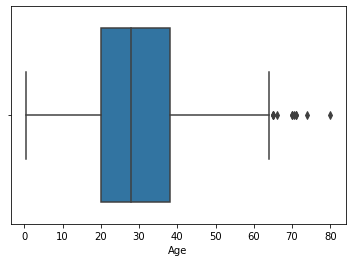

In [12]:
sns.boxplot(x=titanic_df['Age'])

In [13]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())

In [14]:
titanic_df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [15]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

In [16]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Embarked       0
Family         0
dtype: int64

<AxesSubplot:xlabel='Age'>

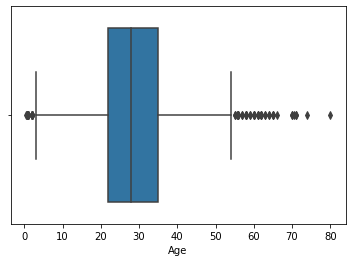

In [17]:
sns.boxplot(x=titanic_df['Age'])

In [18]:
titanic_df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

| old | new |
|-----|-----|
| count    714.000000 | count    891.000000 |
| mean      29.699118 | mean      29.361582 |
| std       14.526497 | std       13.019697 |
| min        0.420000 | min        0.420000 |
| 25%       20.125000 | 25%       22.000000 |
| 50%       28.000000 | 50%       28.000000 |
| 75%       38.000000 | 75%       35.000000 |
| max       80.000000 | max       80.000000 |    

       
       
       
      
       
       
       
       



In [19]:
titanic_df['Adult'] = 0 
titanic_df.loc[titanic_df['Age'] > 18, 'Adult'] = 1

In [20]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family,Adult
0,1,0,3,male,22.0,S,2,1
1,2,1,1,female,38.0,C,2,1
2,3,1,3,female,26.0,S,1,1
3,4,1,1,female,35.0,S,2,1
4,5,0,3,male,35.0,S,1,1
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,S,1,1
887,888,1,1,female,19.0,S,1,1
888,889,0,3,female,28.0,S,4,1
889,890,1,1,male,26.0,C,1,1


In [21]:
titanic_df.drop(columns=['Age'], inplace=True)

In [22]:
print(f"print the number of adult: {titanic_df.loc[titanic_df['Adult']==1].shape[0]}")
print(f"print the number of child: {titanic_df.loc[titanic_df['Adult']!=1].shape[0]}")

print the number of adult: 752
print the number of child: 139


In [23]:
def make_pivot (param1, param2):
    df_slice = titanic_df[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

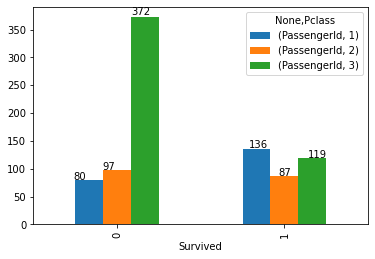

In [24]:
make_pivot("Survived","Pclass")

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

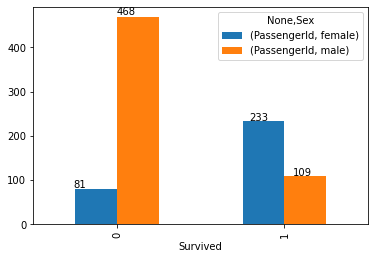

In [25]:
make_pivot("Survived","Sex")

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  219

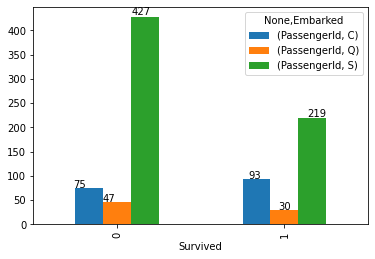

In [26]:
make_pivot("Survived","Embarked")

PassengerId                             
Family            1   2   3   4   5   6  7  8  11
Survived                                         
0                374  72  43   8  12  19  8  6  7
1                163  89  59  21   3   3  4  0  0

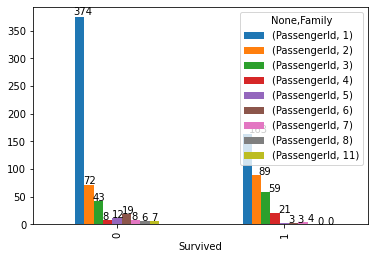

In [27]:
make_pivot("Survived","Family")

PassengerId     
Adult              0    1
Survived                 
0                 69  480
1                 70  272

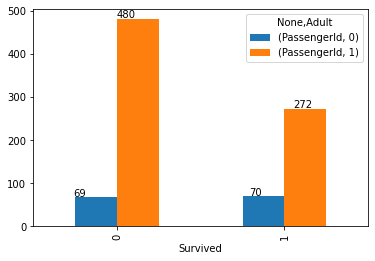

In [28]:
make_pivot("Survived","Adult")

In [29]:
X = titanic_df.filter(['Pclass','Sex','Embarked','Family','Adult'], axis=1)
y = titanic_df.filter(['Survived'], axis=1)

In [30]:
y.shape

(891, 1)

In [31]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [32]:
yhat = np.ravel(y)

In [34]:
le = preprocessing.LabelEncoder()

In [35]:
le.fit(X['Embarked'])

LabelEncoder()

In [36]:
X['Embarked'] = le.transform(X['Embarked'])

In [37]:
X.head()

,Pclass,Sex,Embarked,Family,Adult
0,3,male,2,2,1
1,1,female,0,2,1
2,3,female,2,1,1
3,1,female,2,2,1
4,3,male,2,1,1


In [38]:
le2 = preprocessing.LabelEncoder()
le2.fit(X['Sex'])

LabelEncoder()

In [39]:
X['Sex'] = le2.transform(X['Sex'])

In [40]:
X

,Pclass,Sex,Embarked,Family,Adult
0,3,1,2,2,1
1,1,0,0,2,1
2,3,0,2,1,1
3,1,0,2,2,1
4,3,1,2,1,1
...,...,...,...,...,...
886,2,1,2,1,1
887,1,0,2,1,1
888,3,0,2,4,1
889,1,1,0,1,1


In [41]:
# using SelectKBest to get scores of all features of the DataFrame

test = SelectKBest(f_classif, k='all')
test_fit = test.fit(X, yhat)
feat_score = test_fit.scores_.round(3)
p_values = -np.log10(test_fit.pvalues_).round(3)

In [42]:
print(f'feature_score : {feat_score}')
print(f'p_value : {p_values}')

feature_score : [1.15031e+02 3.72406e+02 2.57170e+01 2.46000e-01 1.00780e+01]
p_value : [24.596 68.852  6.318  0.208  2.809]


In [43]:
feature_list = list(X.columns.values)
selected_features = test.get_support([test_fit])
selected_features

array([0, 1, 2, 3, 4])

In [44]:
temp_list = [ ]

for i in selected_features:
    temp_list.append({'Feature':feature_list[i], 'P_Value':p_values[i], 'Score': feat_score[i]  })
    
feat_select = pd.DataFrame(temp_list)

In [45]:
feat_select = feat_select.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [46]:
feat_select

,Feature,P_Value,Score
1,Sex,68.852,372.406
0,Pclass,24.596,115.031
2,Embarked,6.318,25.717
4,Adult,2.809,10.078
3,Family,0.208,0.246


In [47]:
feat_select = feat_select.set_index('Feature')

In [48]:
feat_select

,P_Value,Score
Feature,,
Sex,68.852,372.406
Pclass,24.596,115.031
Embarked,6.318,25.717
Adult,2.809,10.078
Family,0.208,0.246


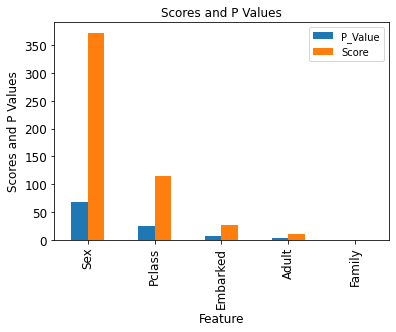

In [49]:
ax = feat_select[['P_Value','Score']].plot(kind='bar', title ="Scores and P Values",  legend=True, fontsize=12)
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Scores and P Values", fontsize=12)
plt.show()

In [50]:
X.drop(['Embarked', 'Family'], axis=1, inplace=True)


In [51]:
X

,Pclass,Sex,Adult
0,3,1,1
1,1,0,1
2,3,0,1
3,1,0,1
4,3,1,1
...,...,...,...
886,2,1,1
887,1,0,1
888,3,0,1
889,1,1,1


In [52]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(X, yhat, test_size=0.3, random_state=42)

In [53]:
knn = KNeighborsClassifier( )
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(knn, k_grid, cv=10, scoring = 'precision')
grid.fit(features_train, labels_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [54]:
grid.cv_results_

{'mean_fit_time': array([0.00136201, 0.00098579, 0.00096004, 0.00096514, 0.00096884,
        0.00096214, 0.00096242, 0.00096018, 0.00094881, 0.00096412,
        0.00095015, 0.00097556, 0.00094731, 0.0009537 , 0.00094726,
        0.00095043, 0.00096769, 0.00096197]),
 'std_fit_time': array([3.76824559e-04, 4.86326040e-05, 6.33857215e-06, 1.09212626e-05,
        1.98157827e-05, 2.52361871e-05, 2.85029486e-05, 2.52813760e-05,
        7.74783351e-06, 2.35665158e-05, 1.07276704e-05, 4.54384531e-05,
        1.25187010e-05, 1.48255145e-05, 8.08829539e-06, 8.95781468e-06,
        3.14318164e-05, 3.05246181e-05]),
 'mean_score_time': array([0.00257571, 0.00134366, 0.00205975, 0.00134201, 0.00204031,
        0.00133908, 0.00202608, 0.00133085, 0.00204036, 0.00136752,
        0.00204804, 0.00140145, 0.00205247, 0.00135539, 0.00205104,
        0.00134888, 0.00206409, 0.001366  ]),
 'std_score_time': array([5.20270313e-04, 2.84506500e-05, 3.41328152e-05, 4.67429095e-05,
        2.41524140e-05, 3.13

In [55]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.8694841269841269


In [56]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 6, 'weights': 'uniform'}


In [57]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(n_neighbors=6)


In [58]:
label_pred = grid.predict(features_test)

In [59]:
acc_clf = metrics.accuracy_score(labels_test,label_pred)
print ("classifier's accuracy: ",str(acc_clf) )

classifier's accuracy:  0.7798507462686567


In [60]:
scr_clf = precision_recall_fscore_support(labels_test,label_pred, average='weighted')

print ("classifier's precision: ",str(scr_clf[0])) 
print ("classifier's recall: ",str(scr_clf[1])) 
print ("classifier's fbeta_score: ",str(scr_clf[2]))

classifier's precision:  0.7960199004975125
classifier's recall:  0.7798507462686567
classifier's fbeta_score:  0.7685534386304673
